# Deep Learning

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
import tensorflow as tf
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense

Tensor: multi-dimensional matrix

In [6]:
x = df.drop('Outcome', axis=1)
y = df[['Outcome']]

In [7]:
df.shape

(768, 9)

In [8]:
model = Sequential()

In [9]:
model.add(Dense(120, activation='relu')) # 8 is the size of the x input
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # The last layer is classification so we use sigmoid

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2024-03-09 10:22:27.007151: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-09 10:22:27.007174: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-09 10:22:27.007180: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-09 10:22:27.007198: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-09 10:22:27.007209: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
# model.fit(x, y, epochs=250, batch_size=32, validation_split=.2, verbose=1)

In [11]:
# model.summary()

In [12]:
from sklearn.preprocessing import normalize, scale

In [13]:
x = scale(x)

In [14]:
history = model.fit(x, y, epochs=150, batch_size=32, validation_split=.2, verbose=1) # Reduced to 150 epochs to speed up

Epoch 1/150


2024-03-09 10:22:28.080301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6472 - loss: 0.6627 - val_accuracy: 0.6429 - val_loss: 0.5916
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6786 - loss: 0.5437 - val_accuracy: 0.7662 - val_loss: 0.5112
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7876 - loss: 0.4838 - val_accuracy: 0.7727 - val_loss: 0.4709
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7838 - loss: 0.4500 - val_accuracy: 0.7662 - val_loss: 0.4915
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8031 - loss: 0.4055 - val_accuracy: 0.7792 - val_loss: 0.4686
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7853 - loss: 0.4741 - val_accuracy: 0.7727 - val_loss: 0.4680
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7956 - loss: 0.4520 - val_accuracy: 0.7662 - val_loss: 0.4919
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7874 - loss: 0.4393 - val_accuracy: 0.7597 - val_l

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 120)            │         1,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,811 (218.02 KB)

 Trainable params: 18,603 (72.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,208 (145.35 KB)

In [16]:
import matplotlib.pyplot as plt

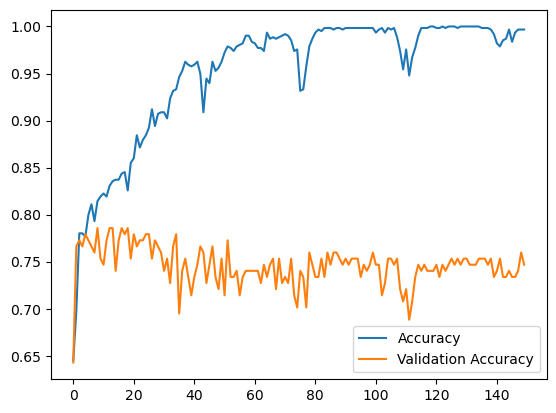

In [21]:
plt.plot(history.history['accuracy'], label='Accuracy');
plt.plot(history.history['val_accuracy'], label='Validation Accuracy');
plt.legend();

The blue line is the model predicting the data it trained itself on. The orange line is the model predicting unseen data. The success of the model is seen from the orange line.

### DNN - Regression

In [22]:
import pandas as pd

In [26]:
df = pd.read_pickle('kc_house.pkl')

In [27]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,...,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
x = df.drop('price', axis=1)
y = df[['price']]

In [29]:
from sklearn.model_selection import train_test_split as tts

In [30]:
x_train, x_test, y_train, y_test = tts(x, y, random_state=42, test_size=.2)

In [31]:
model = Sequential()

In [32]:
model.add(Dense(120, activation='relu')) # 8 is the size of the x input
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

In [33]:
model.compile(loss='mse', optimizer='adam')

In [38]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=300)

Epoch 1/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 8213544448.0000 - val_loss: 9145021440.0000
Epoch 2/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8497483264.0000 - val_loss: 8956105728.0000
Epoch 3/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 8264293376.0000 - val_loss: 8932551680.0000
Epoch 4/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8298295808.0000 - val_loss: 8722202624.0000
Epoch 5/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8708160512.0000 - val_loss: 8702994432.0000
Epoch 6/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8561833984.0000 - val_loss: 8964197376.0000
Epoch 7/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8241988608.0000 - val_loss: 8669341696.0000
Epoch 8/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8393842688.0000 - val_loss: 10366157824.0000
Epoch 9/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8919581696.0000 - val_loss: 9114765312.0000
Epoch 10/300
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [39]:
pred = model.predict(x_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_test, pred)

0.8392322134277335